In [1]:
# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [2]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (168, 300, 3)


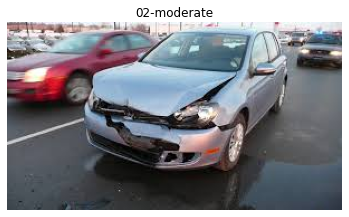

In [3]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data3a/training/",
                        target_class="02-moderate")

Image shape: (189, 266, 3)


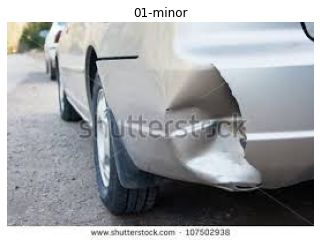

In [5]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data3a/training/",
                        target_class="01-minor")

Image shape: (194, 259, 3)


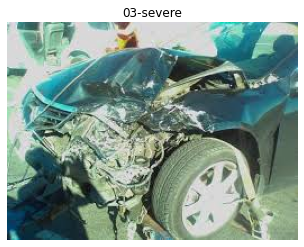

In [6]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data3a/training/",
                        target_class="03-severe")

In [7]:
train="C:/Users/nthaku3/CS_512_Project/preprocessed/data3a/training/"
test="C:/Users/nthaku3/CS_512_Project/preprocessed/data3a/validation/"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42, shuffle=True)

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42, shuffle=False)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [8]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
#from keras.preprocessing import image 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(3, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model_3 = Model(inputs = vgg.input, outputs = x)

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model 
history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 134s 4s/step - loss: 2.5174 - accuracy: 0.4883 - val_loss: 0.9024 - val_accuracy: 0.5263
Epoch 2/10
31/31 [==============================] - 133s 4s/step - loss: 0.7055 - accuracy: 0.6864 - val_loss: 0.7435 - val_accuracy: 0.6433
Epoch 3/10
31/31 [==============================] - 151s 5s/step - loss: 0.5594 - accuracy: 0.7743 - val_loss: 0.7392 - val_accuracy: 0.6433
Epoch 4/10
31/31 [==============================] - 151s 5s/step - loss: 0.4375 - accuracy: 0.8560 - val_loss: 0.7231 - val_accuracy: 0.6667
Epoch 5/10
31/31 [==============================] - 157s 5s/step - loss: 0.3081 - accuracy: 0.9326 - val_loss: 0.8622 - val_accuracy: 0.6140
Epoch 6/10
31/31 [==============================] - 169s 5s/step - loss: 0.2687 - accuracy: 0.9213 - val_loss: 0.7958 - val_accuracy: 0.6550
Epoch 7/10
31/31 [==============================] - 152s 5s/step - loss: 0.1636 - accuracy: 0.9918 - val_loss: 0.7688 - val_accuracy: 0.6667
Epoch 8/10
31

In [10]:
model_3.trainable = True

# Freeze all layers except for the
for layer in model_3.layers[:15]:
    layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])
# Fit the model 
history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 181s 6s/step - loss: 0.3568 - accuracy: 0.8744 - val_loss: 1.3067 - val_accuracy: 0.5673
Epoch 2/10
31/31 [==============================] - 177s 6s/step - loss: 0.0750 - accuracy: 0.9847 - val_loss: 1.1875 - val_accuracy: 0.6374
Epoch 3/10
31/31 [==============================] - 180s 6s/step - loss: 0.0195 - accuracy: 0.9980 - val_loss: 1.4059 - val_accuracy: 0.6257
Epoch 4/10
31/31 [==============================] - 178s 6s/step - loss: 0.0096 - accuracy: 0.9990 - val_loss: 1.3339 - val_accuracy: 0.6550
Epoch 5/10
31/31 [==============================] - 188s 6s/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 1.4298 - val_accuracy: 0.6023
Epoch 6/10
31/31 [==============================] - 202s 7s/step - loss: 0.0084 - accuracy: 0.9990 - val_loss: 1.5747 - val_accuracy: 0.6374
Epoch 7/10
31/31 [==============================] - 203s 7s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.4939 - val_accuracy: 0.6667
Epoch 8/10
31

In [12]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def pred_and_plot(model, filename):
    
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred=pred.argmax()

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred}")
    plt.axis(False)

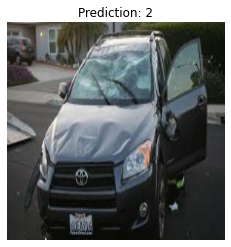

In [13]:
# Test our model 
pred_and_plot(model_3, "C:/Users/nthaku3/CS_512_Project/preprocessed/test2.jpg")

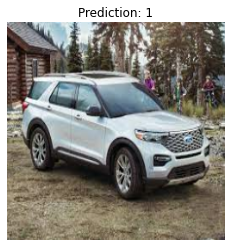

In [14]:
# Test our model 
pred_and_plot(model_3, "C:/Users/nthaku3/CS_512_Project/preprocessed/test3.jpg")

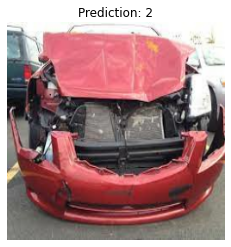

In [15]:
# Test our model 
pred_and_plot(model_3, "C:/Users/nthaku3/CS_512_Project/preprocessed/test1.jpg")

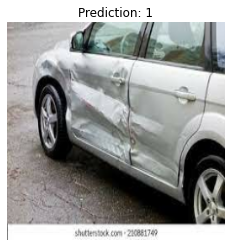

In [16]:
# Test our model 
pred_and_plot(model_3, "C:/Users/nthaku3/CS_512_Project/preprocessed/test4.jpg")

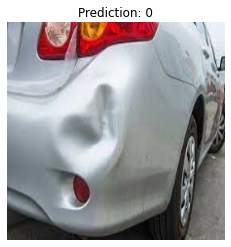

In [17]:
# Test our model 
pred_and_plot(model_3, "C:/Users/nthaku3/CS_512_Project/preprocessed/test5.jpg")